# Randomness

In [12]:
#using numpy

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

rng.random(size=10) #uniform distribution in the range [0,1]

array([0.31726437, 0.93139936, 0.95925862, 0.27835198, 0.50904164,
       0.29277931, 0.19186913, 0.26822926, 0.60173253, 0.73459466])

In [13]:
rng.integers(1,7,size=10) #7 not included

array([6, 3, 6, 6, 2, 4, 2, 2, 3, 6])

In [14]:
rng.normal(size=10) #standard normal

array([ 0.15035186,  0.05299627, -0.23387778,  0.50446835,  0.0328151 ,
        0.01329528,  0.76115865, -1.08288718,  0.99142874, -0.57577971])

In [15]:
rng.normal(loc=1,scale=4,size=10) #loc := mean, scale := std -> mean = 1, std = 4

array([ 2.42710304,  0.92104768, -0.69455307,  3.10559514, -0.88858822,
        6.62441309,  6.38333785, -5.06677226, -4.12573067,  0.60343379])

In [16]:
np.mean(rng.normal(loc=1,scale=4,size=10000))

1.015848059045809

In [17]:
np.std(rng.normal(loc=1,scale=4,size=10000))

3.9769976875938937

In [18]:
sample = np.arange(19)
sample

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [19]:
rng.shuffle(sample)
sample

array([13,  4,  8,  6, 10,  5,  3, 16, 12, 18,  1,  2, 11,  0, 17,  7, 15,
       14,  9])

# Scipy

1) $.05^{10}$

2) $.95^{10}$

3) $.05^{2}*.95^{8}*(10 choose 2)$

4) $ 1 - (.05*.95^{9}*(10 choose 1) + .95^{10})$

In [20]:
answer = .05 **10
f'{answer:.15f}'

'0.000000000000098'

In [21]:
.95**10

0.5987369392383787

In [22]:
(.05**2)*(.95**8)*(45)

0.07463479852001952

In [23]:
import math
math.comb(10,2)*(.05**2)*(.95**8)

0.07463479852001952

In [24]:
1-(.05*.95**9*math.comb(10,1)+.95**10)

0.08613835589931673

In [26]:
from scipy.stats import binom

#pmf: probability mass function
f'{binom.pmf(10,10,0.05):.15f}'

'0.000000000000098'

In [27]:
binom.pmf(0,10,.05)

0.5987369392383787

In [28]:
binom.pmf(2,10,.05)

0.07463479852001963

In [29]:
1-binom.cdf(1,10,.05)

0.0861383558993164

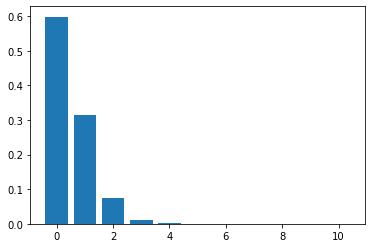

In [32]:
x = np.arange(11)

fig, ax = plt.subplots()
ax.bar(x,binom.pmf(x,10,.05))
plt.show()

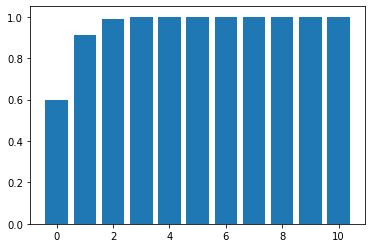

In [33]:
x = np.arange(11)

fig, ax = plt.subplots()
ax.bar(x,binom.cdf(x,10,.05))
plt.show()

Simulate many draws from the distribution and show the dsitribution of the sample mean - the mean number of unemployed people

In [34]:
binom.rvs(10,.05,size=10)

array([0, 0, 0, 2, 1, 0, 0, 0, 2, 2])

In [35]:
np.mean(binom.rvs(10,.05,size=10))

0.4

In [36]:
size = 10000
means = np.zeros(size)
for j in np.arange(size):
    means[j] = np.mean(binom.rvs(10,.05,size=10))

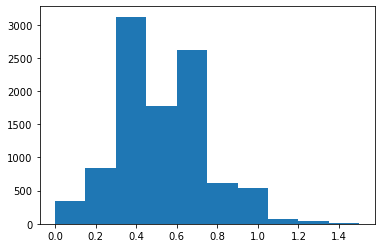

In [37]:
fig, ax = plt.subplots()
ax.hist(means)
plt.show()